# RL example for Regularity Normalization (RN)
---
In this notebook, we demonstrated the empirical performances a DQN agent with or without RN with OpenAI Gym's LunarLander-v2 environment.

### 1. Import the Necessary Packages

In [2]:
import gym
import random
import torch
import numpy as np
import pandas as pd
import math 
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Instantiate the Environment and Agent

Initialize the environment

In [3]:
env = gym.make('BipedalWalker-v2')
env.seed(0)
print('State shape: ', env.observation_space.shape)
print('Number of actions: ', env.action_space)

State shape:  (24,)
Number of actions:  Box(4,)


Here we specify the agent to use:

In [4]:
from dqn_agent import Agent, Agent_UAM

agent = Agent(state_size=24, action_size=4, action_dim=True, seed=0,qnet='DQN-RNLN')

# watch an untrained agent
state = env.reset()
for j in range(200):
    action = agent.act(state)
    env.render()
    state, reward, done, _ = env.step(action)
    if done:
        break 
        
env.close()

### 3. Train the Agent with DQN variants

Train the agents from scratch. 

In [5]:
def dqn(agentName, n_episodes=1000, max_t=2000,eps_start=1.0, eps_end=0.01, eps_decay=0.95, runs=10):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """

    scores_runs = 0*np.ndarray((runs,n_episodes)) # containing scores for each runs
    window_size = 10
    eps = eps_start                               # initialize epsilon
    solved = []
    for run in np.arange(runs):
        scores_window = deque(maxlen=window_size)             # last n scores
        agent = Agent(state_size=24, action_size=4, action_dim=True, seed=run, qnet=agentName)
        firstPast = True
        scores = []                               # list containing scores from each episode
        for i_episode in range(1, n_episodes+1):
            state = env.reset()
            score = 0
            for t in range(max_t):
                action = agent.act(state, eps)
                next_state, reward, done, _ = env.step(action)
                agent.step(state, action, reward, next_state, done)
                state = next_state
                score += reward
                if done:
                    break 
            scores_window.append(score)       # save most recent score
            scores.append(score)              # save most recent score
            eps = max(eps_end, eps_decay*eps) # decrease epsilon
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
            if i_episode % 100 == 0:
                print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            if np.mean(scores_window)>=200.0 and firstPast:
                firstPast = False
                solved.append(i_episode-window_size)
                print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-window_size, np.mean(scores_window)))
                # torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
                # break
        scores_runs[run,:]=scores
    return scores_runs,np.array(solved)


In [5]:
n = 2    # runs
m = 2000  # episodes
alpha = 0.1


In [7]:
print('--------------------------')
print('DQN')
# scores1,solved1 = dqn('DQN',n_episodes=m,runs=n)
# np.save('./scores/bipedalwalker_dqn.npy',scores1)
# np.save('./scores/bipedalwalker_dqn_solved.npy',solved1)

print('--------------------------')
print('DQN-LN')
# scores2,solved2 = dqn('DQN-LN',n_episodes=m,runs=n)
# np.save('./scores/bipedalwalker_dqnln.npy',scores2)
# np.save('./scores/bipedalwalker_dqnln_solved.npy', solved2)

print('--------------------------')
print('DQN-RN')
# scores3,solved3 = dqn('DQN-RN',n_episodes=m,runs=n)
# np.save('./scores/bipedalwalker_dqnrn.npy',scores3)
# np.save('./scores/bipedalwalker_dqnrn_solved.npy', solved3)

print('--------------------------')
print('DQN-RLN')
scores4,solved4 = dqn('DQN-RLN',n_episodes=m,runs=n)
np.save('./scores/bipedalwalker_dqnrln.npy',scores4)
np.save('./scores/bipedalwalker_dqnrln_solved', solved4)

print('--------------------------')
print('DQN-RNLN')
scores5,solved5 = dqn('DQN-RNLN',n_episodes=m,runs=n)
np.save('./scores/bipedalwalker_dqnrnln.npy',scores5)
np.save('./scores/bipedalwalker_dqnrnln_solved.npy', solved5)


--------------------------
DQN
--------------------------
DQN-LN
--------------------------
DQN-RN
Episode 100	Average Score: -109.08
Episode 200	Average Score: -108.66
Episode 300	Average Score: -107.52
Episode 400	Average Score: -105.69
Episode 500	Average Score: -104.96
Episode 600	Average Score: -104.56
Episode 700	Average Score: -104.17
Episode 800	Average Score: -104.08
Episode 900	Average Score: -104.30
Episode 1000	Average Score: -104.35
Episode 1100	Average Score: -104.57
Episode 1200	Average Score: -104.26
Episode 1300	Average Score: -104.23
Episode 1400	Average Score: -104.15
Episode 1500	Average Score: -114.80
Episode 1600	Average Score: -101.64
Episode 1700	Average Score: -101.67
Episode 1800	Average Score: -101.65
Episode 1900	Average Score: -101.70
Episode 2000	Average Score: -101.65
Episode 100	Average Score: -106.62
Episode 200	Average Score: -105.29
Episode 300	Average Score: -112.02
Episode 400	Average Score: -112.51
Episode 500	Average Score: -109.05
Episode 600	Ave

NameError: name 'm' is not defined

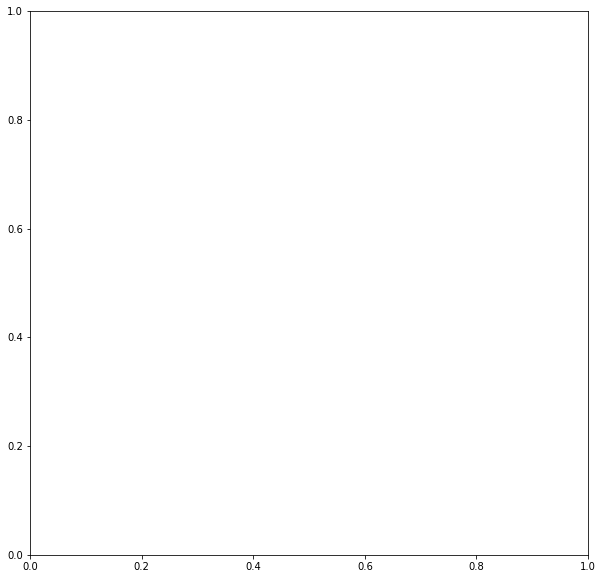

In [6]:
# plot the scores
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

scores1 = np.load('./scores/bipedalwalker_dqn.npy',allow_pickle=True)
scores2 = np.load('./scores/bipedalwalker_dqnln.npy',allow_pickle=True)
scores3 = np.load('./scores/bipedalwalker_dqnrn.npy',allow_pickle=True)
scores4 = np.load('./scores/bipedalwalker_dqnrln.npy',allow_pickle=True)
scores5 = np.load('./scores/bipedalwalker_dqnrnln.npy',allow_pickle=True)


ax.plot(np.arange(m), np.mean(scores1,0),color='black',label='DQN')
ax.plot(np.arange(m), np.mean(scores2,0),color='blue',label='DQN+LN')
ax.plot(np.arange(m), np.mean(scores3,0),color='red',label='DQN+RN')
ax.plot(np.arange(m), np.mean(scores4,0),color='green',label='DQN+RLN')
ax.plot(np.arange(m), np.mean(scores5,0),color='orange',label='DQN+RN+LN')

ax.fill_between(np.arange(m), np.mean(scores1,0)-np.std(scores1,0)/math.sqrt(n),np.mean(scores1,0)+np.std(scores1,0)/math.sqrt(n),alpha=alpha,color='black')
ax.fill_between(np.arange(m), np.mean(scores2,0)-np.std(scores2,0)/math.sqrt(n),np.mean(scores2,0)+np.std(scores2,0)/math.sqrt(n),alpha=alpha,color='blue')
ax.fill_between(np.arange(m), np.mean(scores3,0)-np.std(scores3,0)/math.sqrt(n),np.mean(scores3,0)+np.std(scores3,0)/math.sqrt(n),alpha=alpha,color='red')
ax.fill_between(np.arange(m), np.mean(scores4,0)-np.std(scores4,0)/math.sqrt(n),np.mean(scores4,0)+np.std(scores4,0)/math.sqrt(n),alpha=alpha,color='green')
ax.fill_between(np.arange(m), np.mean(scores5,0)-np.std(scores5,0)/math.sqrt(n),np.mean(scores5,0)+np.std(scores5,0)/math.sqrt(n),alpha=alpha,color='orange')

ax.set_ylabel('Score')
ax.set_xlabel('Episode')
ax.legend()

fig.savefig('bipedalwalker_scores.png')

print('DQN scores ', np.mean(scores1[:,-1]), ' +/- ',np.std(scores1[:,-1])/math.sqrt(n))
print('DQN+LN scores ', np.mean(scores2[:,-1]), ' +/- ',np.std(scores2[:,-1])/math.sqrt(n))
print('DQN+RN scores ', np.mean(scores3[:,-1]), ' +/- ',np.std(scores3[:,-1])/math.sqrt(n))
print('DQN+RLN scores ', np.mean(scores4[:,-1]), ' +/- ',np.std(scores4[:,-1])/math.sqrt(n))
print('DQN+RN+LN scores ', np.mean(scores5[:,-1]), ' +/- ',np.std(scores5[:,-1])/math.sqrt(n))

print('DQN solves in ', np.mean(solved1), ' +/- ',np.std(solved1)/math.sqrt(n))
print('DQN+LN solves in ', np.mean(solved2), ' +/- ',np.std(solved2)/math.sqrt(n))
print('DQN+RN solves in ', np.mean(solved3), ' +/- ',np.std(solved3)/math.sqrt(n))
print('DQN+RLN solves  in ', np.mean(solved4), ' +/- ',np.std(solved4)/math.sqrt(n))
print('DQN+RN+LN solves in ', np.mean(solved5), ' +/- ',np.std(solved5)/math.sqrt(n))

In [ ]:
def dqn_uam(agentName, n_episodes=1000, max_t=2000,eps_start=1.0, eps_end=0.01, eps_decay=0.95, runs=1):
    """Deep Q-Learning - Unsupervised Attention Mechanism
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """

    scores_runs = 0*np.ndarray((runs,n_episodes)) # containing scores for each runs
    window_size = 50
    eps = eps_start                               # initialize epsilon
    solved = []
    MDL_local, MDL_target = [], []
    for run in np.arange(runs):
        MDL_local, MDL_target = [], []

        scores_window = deque(maxlen=window_size)             # last n scores
        agent = Agent_UAM(state_size=24, action_size=4, action_dim=True, seed=run, qnet=agentName)
        firstPast = True
        scores = []                               # list containing scores from each episode
        for i_episode in range(1, n_episodes+1):
            state = env.reset()
            score = 0
            for t in range(max_t):
                action = agent.act(state, eps)
                next_state, reward, done, _ = env.step(action)
                l_local, l_target = agent.step(state, action, reward, next_state, done)
                if l_local != -1:
                    MDL_local.append(l_local)
                    MDL_target.append(l_target)
                state = next_state
                score += reward
                if done:
                    break 
            scores_window.append(score)       # save most recent score
            scores.append(score)              # save most recent score
            eps = max(eps_end, eps_decay*eps) # decrease epsilon
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
            if i_episode % 100 == 0:
                print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            if np.mean(scores_window)>=200.0 and firstPast:
                firstPast = False
                solved.append(i_episode-window_size)
                print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-window_size, np.mean(scores_window)))
                # torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
                # break
        scores_runs[run,:]=scores
    return scores_runs,np.array(solved),MDL_local,MDL_target


In [ ]:
n = 1    # runs
m = 1000  # episodes
alpha = 0.1


In [ ]:
print('--------------------------')
print('DQN')
scores1,solved1,MDL_local1,MDL_target1 = dqn_uam('DQN-UAM',n_episodes=m,runs=n)
np.save('./scores/bipedalwalker_dqn_mdl_local.npy',MDL_local1)
np.save('./scores/bipedalwalker_dqn_mdl_target.npy',MDL_target1)

MDL_local = np.load('./scores/bipedalwalker_dqn_mdl_local.npy',allow_pickle=True)
MDL_target = np.load('./scores/bipedalwalker_dqn_mdl_target.npy',allow_pickle=True)

MDL_local, MDL_target = np.array(MDL_local), np.array(MDL_target)
T = np.arange(MDL_local.shape[0])

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

ax.plot(T, MDL_local[:,1],label='local fc_1')
ax.plot(T, MDL_local[:,2],label='local fc_2')
ax.plot(T, MDL_target[:,1],label='target fc_1')
ax.plot(T, MDL_target[:,2],label='target fc_2')

ax.set_ylabel('MDL')
ax.set_xlabel('Iteration')
ax.legend()
ax.set_title('DQN')

fig.savefig('uam_bipedalwalker_dqn.png',layout='tight')


In [ ]:
print('--------------------------')
print('DQN+LN')
scores2,solved2,MDL_local2,MDL_target2 = dqn_uam('DQN-LN-UAM',n_episodes=m,runs=n)
np.save('./scores/bipedalwalker_dqnln_mdl_local.npy',MDL_local2)
np.save('./scores/bipedalwalker_dqnln_mdl_target.npy',MDL_target2)

MDL_local = np.load('./scores/bipedalwalker_dqnln_mdl_local.npy',allow_pickle=True)
MDL_target = np.load('./scores/bipedalwalker_dqnln_mdl_target.npy',allow_pickle=True)

MDL_local, MDL_target = np.array(MDL_local), np.array(MDL_target)
T = np.arange(MDL_local.shape[0])

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

ax.plot(T, MDL_local[:,1],label='local fc_1')
ax.plot(T, MDL_local[:,2],label='local fc_2')
ax.plot(T, MDL_target[:,1],label='target fc_1')
ax.plot(T, MDL_target[:,2],label='target fc_2')

ax.set_ylabel('MDL')
ax.set_xlabel('Iteration')
ax.legend()
ax.set_title('DQN+LN')

fig.savefig('uam_bipedalwalker_dqnln.png',layout='tight')


In [ ]:
print('--------------------------')
print('DQN+RN')
scores3,solved3,MDL_local3,MDL_target3 = dqn_uam('DQN-RN-UAM',n_episodes=m,runs=n)
np.save('./scores/bipedalwalker_dqnrn_mdl_local.npy',MDL_local3)
np.save('./scores/bipedalwalker_dqnrn_mdl_target.npy',MDL_target3)

MDL_local = np.load('./scores/bipedalwalker_dqnrn_mdl_local.npy',allow_pickle=True)
MDL_target = np.load('./scores/bipedalwalker_dqnrn_mdl_target.npy',allow_pickle=True)

MDL_local, MDL_target = np.array(MDL_local), np.array(MDL_target)
T = np.arange(MDL_local.shape[0])

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

ax.plot(T, MDL_local[:,1],label='local fc_1')
ax.plot(T, MDL_local[:,2],label='local fc_2')
ax.plot(T, MDL_target[:,1],label='target fc_1')
ax.plot(T, MDL_target[:,2],label='target fc_2')

ax.set_ylabel('MDL')
ax.set_xlabel('Iteration')
ax.legend()
ax.set_title('DQN+RN')

fig.savefig('uam_bipedalwalker_dqnrn.png',layout='tight')


In [ ]:
print('--------------------------')
print('DQN+RLN')
scores4,solved4,MDL_local4,MDL_target4 = dqn_uam('DQN-RLN-UAM',n_episodes=m,runs=n)
np.save('./scores/bipedalwalker_dqnrln_mdl_local.npy',MDL_local4)
np.save('./scores/bipedalwalker_dqnrln_mdl_target.npy',MDL_target4)

MDL_local = np.load('./scores/bipedalwalker_dqnrln_mdl_local.npy',allow_pickle=True)
MDL_target = np.load('./scores/bipedalwalker_dqnrln_mdl_target.npy',allow_pickle=True)

MDL_local, MDL_target = np.array(MDL_local), np.array(MDL_target)
T = np.arange(MDL_local.shape[0])

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

ax.plot(T, MDL_local[:,1],label='local fc_1')
ax.plot(T, MDL_local[:,2],label='local fc_2')
ax.plot(T, MDL_target[:,1],label='target fc_1')
ax.plot(T, MDL_target[:,2],label='target fc_2')

ax.set_ylabel('MDL')
ax.set_xlabel('Iteration')
ax.legend()
ax.set_title('DQN+RLN')

fig.savefig('uam_bipedalwalker_dqnrln.png',layout='tight')


In [ ]:
print('--------------------------')
print('DQN+RN+LN')
scores5,solved5,MDL_local5,MDL_target5 = dqn_uam('DQN-RNLN-UAM',n_episodes=m,runs=n)
np.save('./scores/bipedalwalker_dqnrnln_mdl_local.npy',MDL_local5)
np.save('./scores/bipedalwalker_dqnrnln_mdl_target.npy',MDL_target5)
MDL_local = np.load('./scores/bipedalwalker_dqnrnln_mdl_local.npy',allow_pickle=True)
MDL_target = np.load('./scores/bipedalwalker_dqnrnln_mdl_target.npy',allow_pickle=True)

MDL_local, MDL_target = np.array(MDL_local), np.array(MDL_target)
T = np.arange(MDL_local.shape[0])

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

ax.plot(T, MDL_local[:,1],label='local fc_1')
ax.plot(T, MDL_local[:,2],label='local fc_2')
ax.plot(T, MDL_target[:,1],label='target fc_1')
ax.plot(T, MDL_target[:,2],label='target fc_2')

ax.set_ylabel('MDL')
ax.set_xlabel('Iteration')
ax.legend()
ax.set_title('DQN+RN+LN')

fig.savefig('uam_bipedalwalker_dqnrnln.png',layout='tight')


In [ ]:
MDL_local1 = np.array(np.load('./scores/bipedalwalker_dqn_mdl_local.npy',allow_pickle=True))
MDL_target1 = np.array(np.load('./scores/bipedalwalker_dqn_mdl_target.npy',allow_pickle=True))
MDL_local2 = np.array(np.load('./scores/bipedalwalker_dqnln_mdl_local.npy',allow_pickle=True))
MDL_target2 = np.array(np.load('./scores/bipedalwalker_dqnln_mdl_target.npy',allow_pickle=True))
MDL_local3 = np.array(np.load('./scores/bipedalwalker_dqnrn_mdl_local.npy',allow_pickle=True))
MDL_target3 = np.array(np.load('./scores/bipedalwalker_dqnrn_mdl_target.npy',allow_pickle=True))
MDL_local4 = np.array(np.load('./scores/bipedalwalker_dqnrln_mdl_local.npy',allow_pickle=True))
MDL_target4 = np.array(np.load('./scores/bipedalwalker_dqnrln_mdl_target.npy',allow_pickle=True))
MDL_local5 = np.array(np.load('./scores/bipedalwalker_dqnrnln_mdl_local.npy',allow_pickle=True))
MDL_target5 = np.array(np.load('./scores/bipedalwalker_dqnrnln_mdl_target.npy',allow_pickle=True))

MA = 10
maxT = np.min([MDL_local1.shape[0],MDL_local2.shape[0],MDL_local3.shape[0],MDL_local4.shape[0],MDL_local5.shape[0]])
T = np.arange(maxT-MA+1)

l1_fc1 = pd.Series(MDL_local1[:maxT,1]).rolling(window=MA).mean().iloc[MA-1:].values
l2_fc1 = pd.Series(MDL_local2[:maxT,1]).rolling(window=MA).mean().iloc[MA-1:].values
l3_fc1 = pd.Series(MDL_local3[:maxT,1]).rolling(window=MA).mean().iloc[MA-1:].values
l4_fc1 = pd.Series(MDL_local4[:maxT,1]).rolling(window=MA).mean().iloc[MA-1:].values
l5_fc1 = pd.Series(MDL_local5[:maxT,1]).rolling(window=MA).mean().iloc[MA-1:].values
t1_fc1 = pd.Series(MDL_target1[:maxT,1]).rolling(window=MA).mean().iloc[MA-1:].values
t2_fc1 = pd.Series(MDL_target2[:maxT,1]).rolling(window=MA).mean().iloc[MA-1:].values
t3_fc1 = pd.Series(MDL_target3[:maxT,1]).rolling(window=MA).mean().iloc[MA-1:].values
t4_fc1 = pd.Series(MDL_target4[:maxT,1]).rolling(window=MA).mean().iloc[MA-1:].values
t5_fc1 = pd.Series(MDL_target5[:maxT,1]).rolling(window=MA).mean().iloc[MA-1:].values
l1_fc2 = pd.Series(MDL_local1[:maxT,2]).rolling(window=MA).mean().iloc[MA-1:].values
l2_fc2 = pd.Series(MDL_local2[:maxT,2]).rolling(window=MA).mean().iloc[MA-1:].values
l3_fc2 = pd.Series(MDL_local3[:maxT,2]).rolling(window=MA).mean().iloc[MA-1:].values
l4_fc2 = pd.Series(MDL_local4[:maxT,2]).rolling(window=MA).mean().iloc[MA-1:].values
l5_fc2 = pd.Series(MDL_local5[:maxT,2]).rolling(window=MA).mean().iloc[MA-1:].values
t1_fc2 = pd.Series(MDL_target1[:maxT,2]).rolling(window=MA).mean().iloc[MA-1:].values
t2_fc2 = pd.Series(MDL_target2[:maxT,2]).rolling(window=MA).mean().iloc[MA-1:].values
t3_fc2 = pd.Series(MDL_target3[:maxT,2]).rolling(window=MA).mean().iloc[MA-1:].values
t4_fc2 = pd.Series(MDL_target4[:maxT,2]).rolling(window=MA).mean().iloc[MA-1:].values
t5_fc2 = pd.Series(MDL_target5[:maxT,2]).rolling(window=MA).mean().iloc[MA-1:].values


alpha = 0.9                       
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

ax.plot(T, l1_fc1-l1_fc1,label='DQN',color='black',alpha=alpha)
ax.plot(T, l2_fc1-l1_fc1,label='DQN+LN',color='blue',alpha=alpha)
ax.plot(T, l3_fc1-l1_fc1,label='DQN+RN',color='red',alpha=alpha)
ax.plot(T, l4_fc1-l1_fc1,label='DQN+RLN',color='green',alpha=alpha)
ax.plot(T, l5_fc1-l1_fc1,label='DQN+RN+LN',color='orange',alpha=alpha)

ax.set_ylabel('MDL')
ax.set_xlabel('Iteration')
ax.legend()
ax.set_title('Regularization Effect on MDL (local fc_1)')

fig.savefig('uam_bipedalwalker_local_fc_1.png',layout='tight')


fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

ax.plot(T, l1_fc2-l1_fc2,label='DQN',color='black',alpha=alpha)
ax.plot(T, l2_fc2-l1_fc2,label='DQN+LN',color='blue',alpha=alpha)
ax.plot(T, l3_fc2-l1_fc2,label='DQN+RN',color='red',alpha=alpha)
ax.plot(T, l4_fc2-l1_fc2,label='DQN+RLN',color='green',alpha=alpha)
ax.plot(T, l5_fc2-l1_fc2,label='DQN+RN+LN',color='orange',alpha=alpha)

ax.set_ylabel('MDL')
ax.set_xlabel('Iteration')
ax.legend()
ax.set_title('Regularization Effect on MDL (local fc_2)')

fig.savefig('uam_bipedalwalker_local_fc_2.png',layout='tight')

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

ax.plot(T, t1_fc1-t1_fc1,label='DQN',color='black',alpha=alpha)
ax.plot(T, t2_fc1-t1_fc1,label='DQN+LN',color='blue',alpha=alpha)
ax.plot(T, t3_fc1-t1_fc1,label='DQN+RN',color='red',alpha=alpha)
ax.plot(T, t4_fc1-t1_fc1,label='DQN+RLN',color='green',alpha=alpha)
ax.plot(T, t5_fc1-t1_fc1,label='DQN+RN+LN',color='orange',alpha=alpha)

ax.set_ylabel('MDL')
ax.set_xlabel('Iteration')
ax.legend()
ax.set_title('Regularization Effect on MDL (target fc_1)')

fig.savefig('uam_bipedalwalker_target_fc_1.png',layout='tight')


fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

ax.plot(T, t1_fc2-t1_fc2,label='DQN',color='black',alpha=alpha)
ax.plot(T, t2_fc2-t1_fc2,label='DQN+LN',color='blue',alpha=alpha)
ax.plot(T, t3_fc2-t1_fc2,label='DQN+RN',color='red',alpha=alpha)
ax.plot(T, t4_fc2-t1_fc2,label='DQN+RLN',color='green',alpha=alpha)
ax.plot(T, t5_fc2-t1_fc2,label='DQN+RN+LN',color='orange',alpha=alpha)

ax.set_ylabel('MDL')
ax.set_xlabel('Iteration')
ax.legend()
ax.set_title('Regularization Effect on MDL (target fc_2)')

fig.savefig('uam_bipedalwalker_target_fc_2.png',layout='tight')

In [ ]:
# MDL_local1 = np.array(np.load('./scores/bipedalwalker_dqn_mdl_local.npy',allow_pickle=True))
# MDL_target1 = np.array(np.load('./scores/bipedalwalker_dqn_mdl_target.npy',allow_pickle=True))
# MDL_local2 = np.array(np.load('./scores/bipedalwalker_dqnln_mdl_local.npy',allow_pickle=True))
# MDL_target2 = np.array(np.load('./scores/bipedalwalker_dqnln_mdl_target.npy',allow_pickle=True))
# MDL_local3 = np.array(np.load('./scores/bipedalwalker_dqnrn_mdl_local.npy',allow_pickle=True))
# MDL_target3 = np.array(np.load('./scores/bipedalwalker_dqnrn_mdl_target.npy',allow_pickle=True))
# MDL_local4 = np.array(np.load('./scores/bipedalwalker_dqnrln_mdl_local.npy',allow_pickle=True))
# MDL_target4 = np.array(np.load('./scores/bipedalwalker_dqnrln_mdl_target.npy',allow_pickle=True))
# MDL_local5 = np.array(np.load('./scores/bipedalwalker_dqnrnln_mdl_local.npy',allow_pickle=True))
# MDL_target5 = np.array(np.load('./scores/bipedalwalker_dqnrnln_mdl_target.npy',allow_pickle=True))

# MA = 10
# maxT = np.min([MDL_local1.shape[0],MDL_local2.shape[0],MDL_local3.shape[0],MDL_local4.shape[0],MDL_local5.shape[0]])
# T = np.arange(maxT-MA+1)

# l1_fc1 = pd.Series(MDL_local1[:maxT,1]).rolling(window=MA).mean().iloc[MA-1:].values
# l2_fc1 = pd.Series(MDL_local2[:maxT,1]).rolling(window=MA).mean().iloc[MA-1:].values
# l3_fc1 = pd.Series(MDL_local3[:maxT,1]).rolling(window=MA).mean().iloc[MA-1:].values
# l4_fc1 = pd.Series(MDL_local4[:maxT,1]).rolling(window=MA).mean().iloc[MA-1:].values
# l5_fc1 = pd.Series(MDL_local5[:maxT,1]).rolling(window=MA).mean().iloc[MA-1:].values
# t1_fc1 = pd.Series(MDL_target1[:maxT,1]).rolling(window=MA).mean().iloc[MA-1:].values
# t2_fc1 = pd.Series(MDL_target2[:maxT,1]).rolling(window=MA).mean().iloc[MA-1:].values
# t3_fc1 = pd.Series(MDL_target3[:maxT,1]).rolling(window=MA).mean().iloc[MA-1:].values
# t4_fc1 = pd.Series(MDL_target4[:maxT,1]).rolling(window=MA).mean().iloc[MA-1:].values
# t5_fc1 = pd.Series(MDL_target5[:maxT,1]).rolling(window=MA).mean().iloc[MA-1:].values
# l1_fc2 = pd.Series(MDL_local1[:maxT,2]).rolling(window=MA).mean().iloc[MA-1:].values
# l2_fc2 = pd.Series(MDL_local2[:maxT,2]).rolling(window=MA).mean().iloc[MA-1:].values
# l3_fc2 = pd.Series(MDL_local3[:maxT,2]).rolling(window=MA).mean().iloc[MA-1:].values
# l4_fc2 = pd.Series(MDL_local4[:maxT,2]).rolling(window=MA).mean().iloc[MA-1:].values
# l5_fc2 = pd.Series(MDL_local5[:maxT,2]).rolling(window=MA).mean().iloc[MA-1:].values
# t1_fc2 = pd.Series(MDL_target1[:maxT,2]).rolling(window=MA).mean().iloc[MA-1:].values
# t2_fc2 = pd.Series(MDL_target2[:maxT,2]).rolling(window=MA).mean().iloc[MA-1:].values
# t3_fc2 = pd.Series(MDL_target3[:maxT,2]).rolling(window=MA).mean().iloc[MA-1:].values
# t4_fc2 = pd.Series(MDL_target4[:maxT,2]).rolling(window=MA).mean().iloc[MA-1:].values
# t5_fc2 = pd.Series(MDL_target5[:maxT,2]).rolling(window=MA).mean().iloc[MA-1:].values

alpha = 0.9

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

ax.plot(T, l1_fc1-l1_fc2,label='DQN',color='black',alpha=alpha)
ax.plot(T, l2_fc1-l2_fc2,label='DQN+LN',color='blue',alpha=alpha)
ax.plot(T, l3_fc1-l3_fc2,label='DQN+RN',color='red',alpha=alpha)
ax.plot(T, l4_fc1-l4_fc2,label='DQN+RLN',color='green',alpha=alpha)
ax.plot(T, l5_fc1-l5_fc2,label='DQN+RN+LN',color='orange',alpha=alpha)

ax.set_ylabel('MDL')
ax.set_xlabel('Iteration')
ax.legend()
ax.set_title('Regularization Effect (local fc_1 - local fc_2)')

fig.savefig('uam_bipedalwalker_local_diff.png',layout='tight')


fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

ax.plot(T, l1_fc1-t1_fc1,label='DQN',color='black',alpha=alpha)
ax.plot(T, l2_fc1-t2_fc1,label='DQN+LN',color='blue',alpha=alpha)
ax.plot(T, l3_fc1-t3_fc1,label='DQN+RN',color='red',alpha=alpha)
ax.plot(T, l4_fc1-t4_fc1,label='DQN+RLN',color='green',alpha=alpha)
ax.plot(T, l5_fc1-t5_fc1,label='DQN+RN+LN',color='orange',alpha=alpha)

ax.set_ylabel('MDL')
ax.set_xlabel('Iteration')
ax.legend()
ax.set_title('Regularization Effect (local fc_1 - target fc_1)')

fig.savefig('uam_bipedalwalker_local_target_fc_1.png',layout='tight')

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

ax.plot(T, t1_fc1-t1_fc2,label='DQN',color='black',alpha=alpha)
ax.plot(T, t2_fc1-t2_fc2,label='DQN+LN',color='blue',alpha=alpha)
ax.plot(T, t3_fc1-t3_fc2,label='DQN+RN',color='red',alpha=alpha)
ax.plot(T, t4_fc1-t4_fc2,label='DQN+RLN',color='green',alpha=alpha)
ax.plot(T, t5_fc1-t5_fc2,label='DQN+RN+LN',color='orange',alpha=alpha)

ax.set_ylabel('MDL')
ax.set_xlabel('Iteration')
ax.legend()
ax.set_title('Regularization Effect (target fc_1 - target fc_2)')

fig.savefig('uam_bipedalwalker_target_diff.png',layout='tight')


fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

ax.plot(T, l1_fc2-t1_fc2,label='DQN',color='black',alpha=alpha)
ax.plot(T, l2_fc2-t2_fc2,label='DQN+LN',color='blue',alpha=alpha)
ax.plot(T, l3_fc2-t3_fc2,label='DQN+RN',color='red',alpha=alpha)
ax.plot(T, l4_fc2-t4_fc2,label='DQN+RLN',color='green',alpha=alpha)
ax.plot(T, l5_fc2-t5_fc2,label='DQN+RN+LN',color='orange',alpha=alpha)

ax.set_ylabel('MDL')
ax.set_xlabel('Iteration')
ax.legend()
ax.set_title('Regularization Effect (local fc_2 - target fc_2)')

fig.savefig('uam_bipedalwalker_local_target_fc_2.png',layout='tight')

